In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")


# Combine the data into a single dataset
df = pd.merge( ride_data,city_data,how="outer")
# Display the data table for preview
df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Divided dataframe to 3 dataframes based on types: 

df_urban = df[df['type'] == "Urban"]
df_suburban = df[df['type'] == "Suburban"]
df_rural = df[df['type'] == "Rural"]

## Bubble Plot of Ride Sharing Data

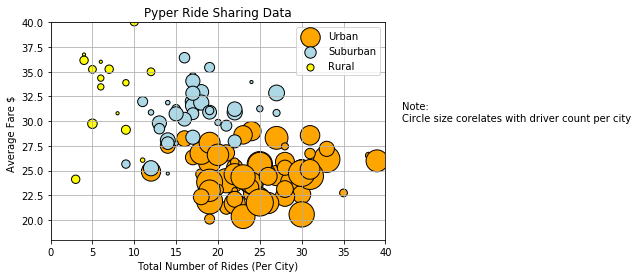

In [26]:

# Obtain the x and y coordinates for each of the three city types
# For Urban: 
group_urban_df = df_urban.groupby(["city"])
urban_x_axis = group_urban_df.mean()['fare']
urban_y_axis = group_urban_df['ride_id'].count()
urban_size = group_urban_df['driver_count'].mean()
# For Suburban: 
group_suburban_df = df_suburban.groupby(["city"])
suburban_x_axis = group_suburban_df['fare'].mean()
suburban_y_axis = group_suburban_df['ride_id'].count()
suburban_size = group_suburban_df['driver_count'].mean()

# For Rural: 

group_rural_df = df_rural.groupby(["city"])
rural_x_axis = group_rural_df['fare'].mean()
rural_y_axis = group_rural_df['ride_id'].count()
rural_size = group_rural_df['driver_count'].mean()

# Build the scatter plots for each city types

plt.scatter(urban_y_axis, urban_x_axis,urban_size*10, marker="o", facecolors="orange", edgecolors="black")
plt.scatter(suburban_y_axis, suburban_x_axis,suburban_size*10, marker="o", facecolors="lightblue", edgecolors="black")
plt.scatter(rural_y_axis, rural_x_axis,rural_size*10, marker="o", facecolors="yellow", edgecolors="black")


# Incorporate the other graph properties

plt.title("Pyper Ride Sharing Data")
plt.ylabel("Average Fare $ ")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylim(18,40)
plt.xlim(0,40)
plt.grid()

# Create a legend
plt.legend(loc="best",labels = ['Urban','Suburban','Rural'])

# Incorporate a text label regarding circle size
plt.text(42,30,"Note:\nCircle size corelates with driver count per city")

# Save Figure
plt.savefig("Pyper.png")


In [4]:
# Show plot
plt.show()

# Total Fares by City Type

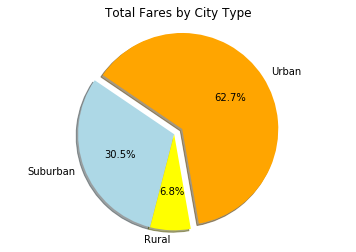

In [5]:
# Calculate Type Percents
urban_total_fare = df_urban['fare'].sum()
suburban_total_fare = df_suburban['fare'].sum()
rural_total_fare = df_rural['fare'].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section
sizes = [urban_total_fare,suburban_total_fare,rural_total_fare]

# The colors of each section of the pie chart
colors = ["orange","lightblue","yellow"]

# How far to seperate each section:
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.axis("equal")

# Pie chart title:
plt.title("Total Fares by City Type")

# Save Figure
plt.savefig("PieTotalFares.png")



In [6]:
# Show Figure
plt.show()

# Total Rides by City Type


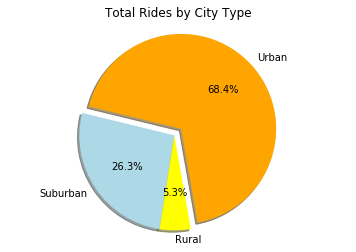

In [7]:
# Calculate Ride Percents
urban_total_rides = df_urban['ride_id'].count()
suburban_total_rides = df_suburban['ride_id'].count()
rural_total_rides = df_rural['ride_id'].count()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section
sizes = [urban_total_rides,suburban_total_rides,rural_total_rides]

# The colors of each section of the pie chart
colors = ["orange","lightblue","yellow"]

# How far to seperate each section:
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.axis("equal")

# Pie chart title:
plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("PieTotalRides.png")


In [8]:
# Show Figure
plt.show()

# Total Drivers by City Type

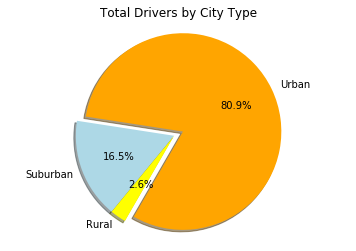

In [9]:
# Calculate Driver Percents

urban_total_drivers = group_urban_df['driver_count'].first().sum()
suburban_total_drivers = group_suburban_df['driver_count'].first().sum()
rural_total_drivers = group_rural_df['driver_count'].first().sum()


# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section
sizes = [urban_total_drivers,suburban_total_drivers,rural_total_drivers]

# The colors of each section of the pie chart
colors = ["orange","lightblue","yellow"]

# How far to seperate each section:
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")

# Pie chart title:
plt.title("Total Drivers by City Type")

# Save Figure
plt.savefig("PieTotalDrivers.png")





In [10]:
# Show Figure
plt.show()
